# Half Adder in Digital Logic

A half adder is a digital logic circuit that performs binary addition of two single-bit binary numbers. It has two inputs, A and B, and two outputs: SUM and CARRY. In classical computers, the half adder can be implemented using basic gates such as XOR and AND gates.

While the half adder may not be very useful on its own, it serves as a building block for more complex adder circuits, such as full adders and multiple-bit adders.

## Half-Adder Outputs

SUM: The SUM output is the XOR of the two inputs, A and B. This means that a "1" is generated only when one of the inputs is equal to "1", and "0" otherwise.

CARRY: The CARRY output indicates whether there was a carry-over from the addition of the two inputs. The CARRY is computed as the AND of the two inputs. This means that CARRY is "1" only if both inputs are "1".

Below is the truth table and the implementation of the half adder in a circuit:

![![image.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/gq/2015/07/ha_truth-300x235.png)](attachment:image.png)


![![image-2.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/Half_Adder.jpg)](attachment:image-2.png)
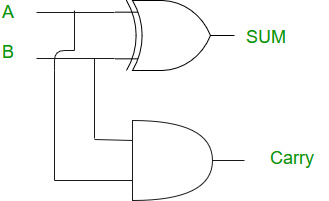
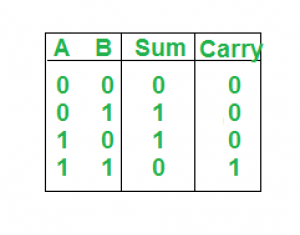

# Half-Adder in a Quantum Circuit

We can use the same logic as in classical computers to create a Half-Adder in quantum computers. Since the gates in quantum circuits are different from those used in classical ones, I will first explain the quantum gates used in our Quantum Half-Adder and their operation on the qubits.

## Quantum Gates Used

### CNOT Gate for the Sum

The gate used for calculating the sum is the CNOT gate (Controlled-NOT gate). This gate is a two-qubit gate applied to two qubits. One of the qubits acts as a control qubit, while the other acts as a target qubit. Based on the value of the control qubit, an X (Pauli-X) gate is applied to the target qubit. The X gate works just like a classical NOT gate, meaning it transforms “|0>” into “|1>” and “|1>” into “|0>”.

For the SUM part of the adder, we use two CNOT gates. The control qubits are the two input qubits, while the target qubit stores the sum. Below you can see the first part of our Half-Adder:

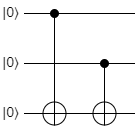 

The two upper qubits are the input qubits, while the third is the sum qubit. The logic is as follows:

If the input is “00”, no X gate is applied to the third qubit, resulting in it remaining “|0>”.

If the inputs are either “10” or “01”, only one X gate is applied to the SUM qubit, resulting in “|1>”.

If the input is “11”, two X gates are applied to the third qubit. Due to the unitarity of quantum mechanics (https://en.wikipedia.org/wiki/Unitarity_(physics)), quantum circuits are reversible, meaning that two X gates applied sequentially have the same effect as applying an identity matrix, thus yielding a sum of “|0>”.

### Toffoli Gate for the Carry

To calculate the CARRY, we use a different gate called the Toffoli gate (Controlled-Controlled-NOT gate). The Toffoli gate is similar to the CNOT gate, but it has two control qubits. This means that the X (Pauli-X) gate is applied to the CARRY qubit only if both input qubits are “|1>”.

Below you can see our complete circuit:

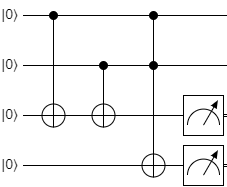lease 

## Example: Input “|11>”

Let’s see how the circuit works with an example.

For an input of “11”, the classical adder should give a SUM of “0” and a CARRY of “1”. In our quantum circuit, both X gates are applied to the SUM qubit, giving it a value of “|0>”. The Toffoli gate is then activated, giving the CARRY qubit the value “|1>”.

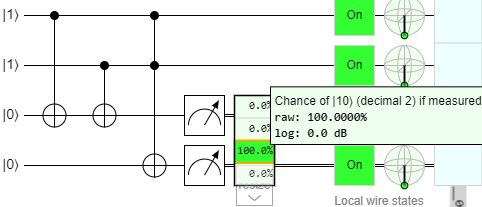

In the picture above, after measurement, the probability of measuring “|10>” (decimal 2) is 100%.

## Summary

The CNOT gate is used to compute the SUM, acting like an XOR operation.

The Toffoli gate is used to compute the CARRY, acting like an AND gate.

This quantum Half-Adder replicates classical logic operations and forms the basis for larger quantum arithmetic circuits.



# Implementation in Qiskit

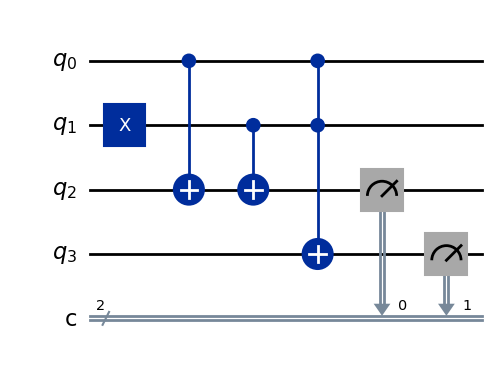

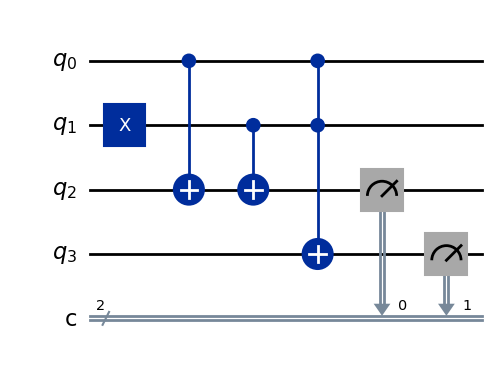

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline
import matplotlib.pyplot as plt

# As seen above we will need four qubits in the Quantum Register and two bits in the classical one
qc = QuantumCircuit(4, 2)

# Get user input for qubits A and B
input_a = int(input("Enter value for qubit A (0 or 1): "))
input_b = int(input("Enter value for qubit B (0 or 1): "))

# Initialize qubits A and B based on user input
if input_a == 1:
    qc.x(0)  
if input_b == 1:
    qc.x(1)  

# Now its time to apply the CNOT gates
qc.cx(0, 2)
qc.cx(1, 2)

# And this is the Toffoli gate with 0,1 being the control qubit while 3 is the target CARRY qubit
qc.ccx(0, 1, 3)

# The final step is to extract the outsputs and assign them to the bits of the classical register
qc.measure(2,0) # Measure qubit 2 (SUM) and assigns it to bit 0
qc.measure(3,1) # Measure qubit 3 (CARRY) and assigns it to bit 1

qc.draw(output='mpl')

# Running the circuit in a Quantum Computer

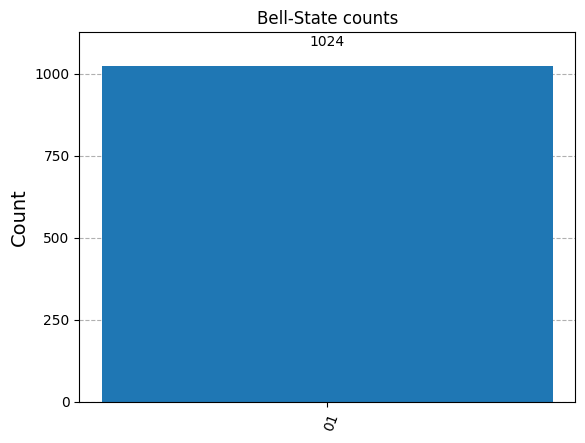

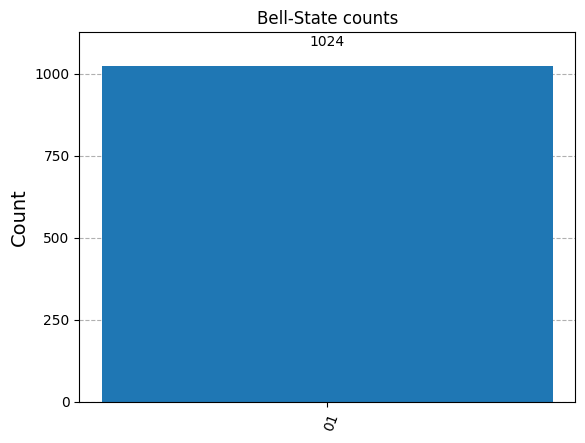

In [13]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)